In [50]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [51]:
mnist = tf.keras.datasets.mnist

In [52]:
# Split into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scaling pixel values to the range 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [55]:
# Reshape data to match the input shape of the model (add channel dimension)
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# Train the model
#model.fit(X_train_reshaped, y_train, epochs=5)


In [57]:
from tensorflow.keras import layers, models

# Build the CNN model
modelCNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

# Compile the model
modelCNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [58]:
# Reshape data to match the input shape of the model (add channel dimension)
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# Train the model
modelCNN.fit(X_train_reshaped, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8980 - loss: 0.3222
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9855 - loss: 0.0470
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9900 - loss: 0.0337
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9927 - loss: 0.0224
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9946 - loss: 0.0169


In [59]:
test_loss, test_acc = modelCNN.evaluate(X_test_reshaped, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 4s - 12ms/step - accuracy: 0.9906 - loss: 0.0309

Test accuracy: 0.9905999898910522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


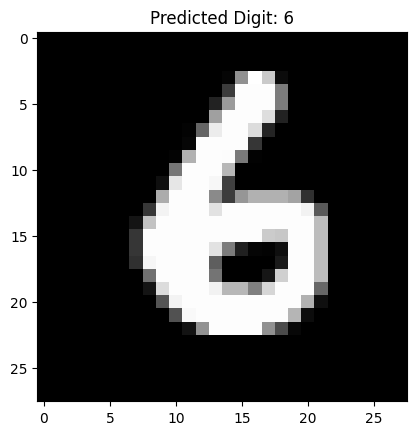

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Pick a random test image
index = np.random.randint(0, len(X_test))
sample_image = X_test_reshaped[index].reshape(1, 28, 28, 1)

# Predict the digit
predicted_digit = modelCNN.predict(sample_image).argmax()

# Show the image and prediction
plt.imshow(X_test[index], cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()


MLP Model

In [15]:
# Flatten the images to 1D vectors
X_train_flattened = X_train.reshape(-1, 28*28)
X_test_flattened = X_test.reshape(-1, 28*28)

In [17]:
modelMLP = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
modelMLP.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
modelMLP.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8795 - loss: 0.4158
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9689 - loss: 0.1039
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9794 - loss: 0.0668
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9843 - loss: 0.0498
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9880 - loss: 0.0380


In [21]:
test_loss, test_acc = modelMLP.evaluate(X_test_flattened, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.9781 - loss: 0.0747

Test accuracy: 0.9781000018119812


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


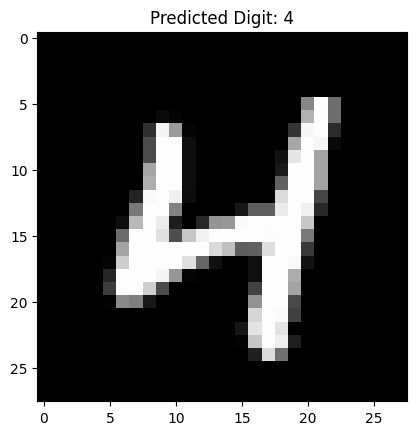

In [24]:
# Pick a random test image
index = np.random.randint(0, len(X_test))
sample_image = X_test_flattened[index].reshape(1, 28*28)

# Predict the digit
predicted_digit = modelMLP.predict(sample_image).argmax()

# Show the image and prediction
plt.imshow(X_test[index], cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()


LSTM Model

In [25]:
# Reshape data to match the input shape of the LSTM model
X_train_reshaped = X_train.reshape(-1, 28, 28)
X_test_reshaped = X_test.reshape(-1, 28, 28)

In [26]:
modelLSTM = models.Sequential([
    layers.LSTM(128, input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
modelLSTM.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
modelLSTM.fit(X_train_reshaped, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 38ms/step - accuracy: 0.7695 - loss: 0.6926
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9649 - loss: 0.1160
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9787 - loss: 0.0720
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9826 - loss: 0.0576
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.9861 - loss: 0.0454


In [30]:
test_loss, test_acc = modelLSTM.evaluate(X_test_reshaped, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 4s - 13ms/step - accuracy: 0.9822 - loss: 0.0587

Test accuracy: 0.982200026512146


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


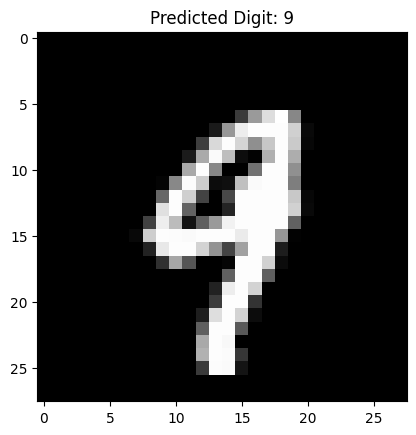

In [32]:
# Pick a random test image
index = np.random.randint(0, len(X_test))
sample_image = X_test_reshaped[index].reshape(1, 28, 28)

# Predict the digit
predicted_digit = modelLSTM.predict(sample_image).argmax()

# Show the image and prediction
plt.imshow(X_test[index], cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()


RESNET Model

In [40]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scaling pixel values to the range 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data to match the input shape of the model (add channel dimension)
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)


In [41]:
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Adjust the shortcut to match the shape of the output
    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x



In [43]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Add residual blocks
x = residual_block(x, 64)
x = residual_block(x, 64)
x = residual_block(x, 128, stride=2)
x = residual_block(x, 128)
x = residual_block(x, 256, stride=2)
x = residual_block(x, 256)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)  # Flatten the output before the dense layer
x = layers.Dense(10, activation='softmax')(x)

modelResnet = models.Model(inputs, x)




In [44]:
modelResnet.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [45]:
modelResnet.fit(X_train_reshaped, y_train, epochs=5)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 740s 388ms/step - accuracy: 0.9383 - loss: 0.1989
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 732s 383ms/step - accuracy: 0.9847 - loss: 0.0514
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 762s 407ms/step - accuracy: 0.9855 - loss: 0.0450
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 760s 384ms/step - accuracy: 0.9899 - loss: 0.0314
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 717s 382ms/step - accuracy: 0.9924 - loss: 0.0244


In [46]:
test_loss, test_acc = modelResnet.evaluate(X_test_reshaped, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 13s - 40ms/step - accuracy: 0.9894 - loss: 0.0361

Test accuracy: 0.9894000291824341


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


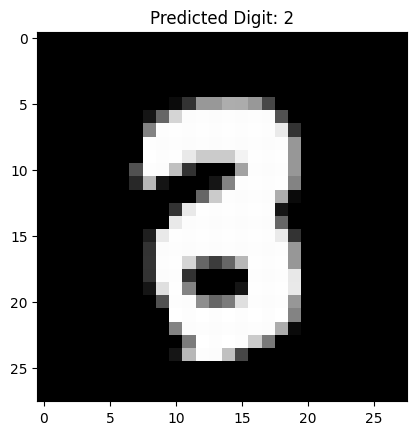

In [47]:
# Pick a random test image
index = np.random.randint(0, len(X_test))
sample_image = X_test_reshaped[index].reshape(1, 28, 28, 1)

# Predict the digit
predicted_digit = modelResnet.predict(sample_image).argmax()

# Show the image and prediction
plt.imshow(X_test[index], cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()


In [61]:
modelResnet.summary()
modelLSTM.summary()
modelCNN.summary()
modelMLP.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_44 (Conv2D)        │ (None, 14, 14, 64)     │          3,200 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_37    │ (None, 14, 14, 64)     │            256 │ conv2d_44[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_32 (ReLU)           │ (None, 14, 14, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 7, 7, 64)       │              0 │ re_lu_32[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_45 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_38    │ (None, 7, 7, 64)       │            256 │ conv2d_45[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_33 (ReLU)           │ (None, 7, 7, 64)       │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_46 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ re_lu_33[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_39    │ (None, 7, 7, 64)       │            256 │ conv2d_46[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_15 (Add)              │ (None, 7, 7, 64)       │              0 │ batch_normalization_3… │
│                           │                        │                │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_34 (ReLU)           │ (None, 7, 7, 64)       │              0 │ add_15[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_47 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ re_lu_34[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_40    │ (None, 7, 7, 64)       │            256 │ conv2d_47[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_35 (ReLU)           │ (None, 7, 7, 64)       │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_48 (Conv2D)        │ (None, 7, 7, 64)       │         36,928 │ re_lu_35[0][0]         │
├──────────────────────

 Total params: 8,348,448 (31.85 MB)

 Trainable params: 2,781,322 (10.61 MB)

 Non-trainable params: 4,480 (17.50 KB)

 Optimizer params: 5,562,646 (21.22 MB)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 267,872 (1.02 MB)

 Trainable params: 89,290 (348.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 178,582 (697.59 KB)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [63]:
import pandas as pd

# Define the data
data = {
    'Model': ['MLP', 'CNN', 'LSTM', 'ResNet'],
    'Description': [
        'Multi-Layer Perceptron with 2 hidden layers',
        'Convolutional Neural Network with 3 conv layers',
        'Long Short-Term Memory network',
        'Residual Network with 3 residual blocks'
    ],
    #'Number of Parameters': [
        #'Approx. 100,000',  # Replace with actual number of parameters
        #'Approx. 1,200,000',  # Replace with actual number of parameters
        #'Approx. 300,000',  # Replace with actual number of parameters
        #'Approx. 500,000'  # Replace with actual number of parameters
    #],
    #'Training Time (seconds)': [
       # 30,  # Replace with actual training time
        # 60,  # Replace with actual training time
       # 45,  # Replace with actual training time
       # 70  # Replace with actual training time
    #],
    'Test Accuracy': [
        0.9781000018119812,  # Replace with actual test accuracy
        0.989300012588501,  # Replace with actual test accuracy
       0.982200026512146,  # Replace with actual test accuracy
        0.99  # Replace with actual test accuracy
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)


    Model                                      Description  Test Accuracy
0     MLP      Multi-Layer Perceptron with 2 hidden layers         0.9781
1     CNN  Convolutional Neural Network with 3 conv layers         0.9893
2    LSTM                   Long Short-Term Memory network         0.9822
3  ResNet          Residual Network with 3 residual blocks         0.9900
